<a href="https://colab.research.google.com/github/pulkitrajput147/ML-projects/blob/master/Project_Red_Wine_Quality_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [ ]:
df=pd.read_csv('./winequality-red.csv')

In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
df.shape

(1599, 12)

In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


**Checking Outliers**

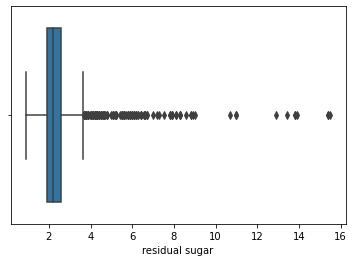

In [ ]:
sns.boxplot(x=df['residual sugar'])

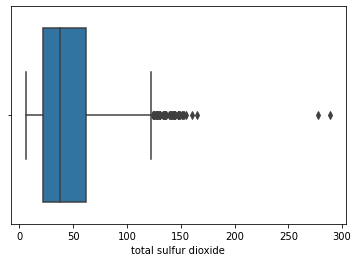

In [ ]:
sns.boxplot(x=df['total sulfur dioxide'])

**Treaing the outliers using Z-score**

In [ ]:
z=np.abs(stats.zscore(df['residual sugar']))
threshold=3
print(np.where(z>3))

(array([  33,  163,  164,  274,  324,  325,  396,  400,  480,  494,  595,
        649,  652,  911,  917,  923, 1043, 1071, 1074, 1079, 1081, 1186,
       1235, 1244, 1434, 1435, 1474, 1476, 1574, 1589]),)


In [ ]:
df=df[(z<3)]

In [ ]:
z=np.abs(stats.zscore(df['total sulfur dioxide']))
threshold=3
print(np.where(z>3))
df=df[(z<3)]

(array([  14,   15,   89,  108,  144,  185,  186,  198,  216,  348,  505,
        513,  581,  625,  626,  639,  659,  671,  758,  759, 1376, 1377,
       1465, 1468]),)


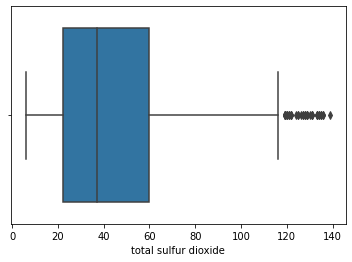

In [ ]:
sns.boxplot(x=df['total sulfur dioxide'])

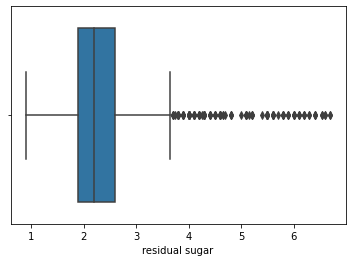

In [ ]:
sns.boxplot(x=df['residual sugar'])

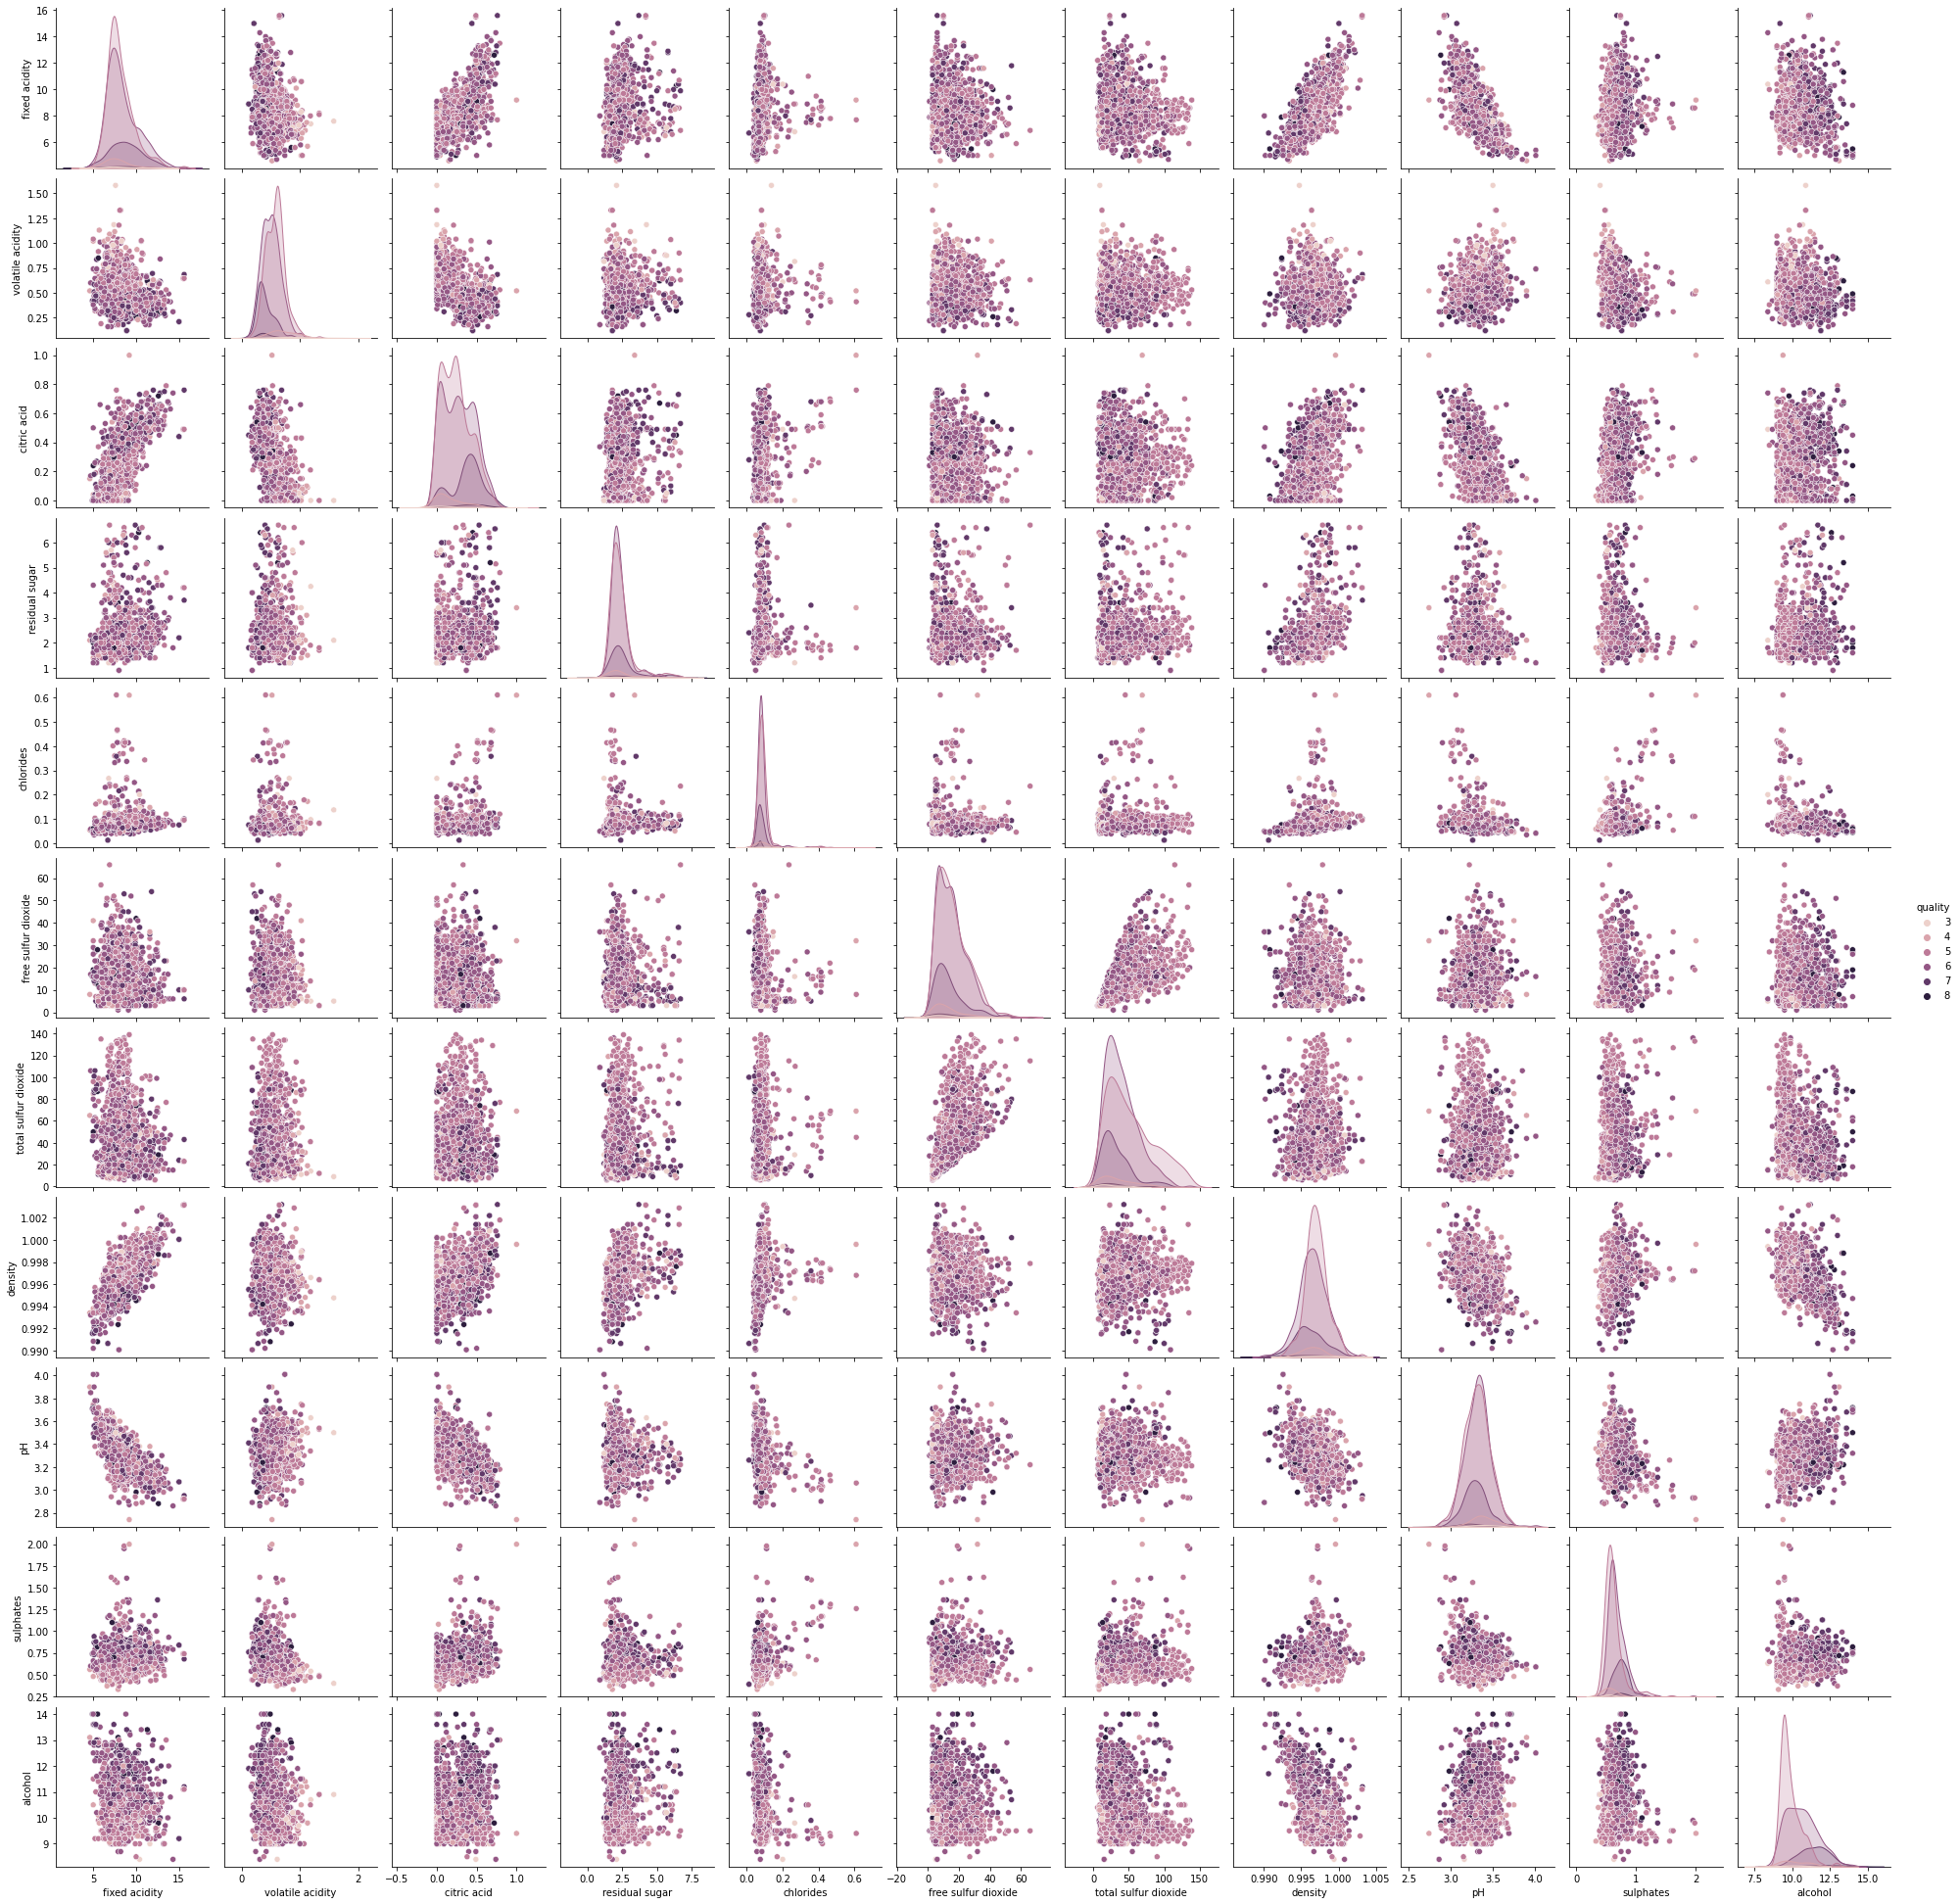

In [ ]:
sns.pairplot(df,hue='quality')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


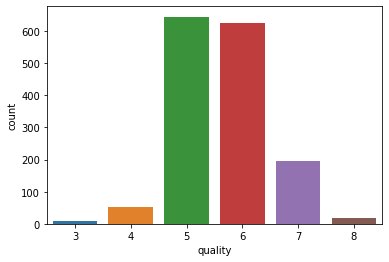

In [ ]:
sns.countplot(df['quality'])

In [ ]:
X=df.drop('quality',axis=1)
Y=df['quality']

In [ ]:

#train test split
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=45)

**Training model on XGBoost Classifier**

In [ ]:
import xgboost as xgb
model=xgb.XGBClassifier(max_depth=3,n_estimators=8000,learning_rate=0.3,n_jobs=-1)
model.fit(X_train,Y_train)
accuracy_score(Y_test,model.predict(X_test))

0.6699029126213593

**Training model on RandomForest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model1=RandomForestClassifier(n_estimators=8000,n_jobs=-1,random_state=42)
model1.fit(X_train,Y_train)
accuracy_score(Y_test,model1.predict(X_test))

0.7119741100323624

In [ ]:
# Checking Cross-validation accuracy
from sklearn.model_selection import  cross_val_score
cross_validation=cross_val_score(estimator=model1,X=X_train,y=Y_train,cv=5)
print("cross validation mean accuracy of the  model  is = ",cross_validation.mean())

cross validation mean accuracy of the  model  is =  0.6625865221366071


In [ ]:
qual=model1.predict([[7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4]])
if(qual>=5):
  print("good")
else:
  print("Bad")

good


**Training the model on Bagging Classifier**

In [ ]:
# saving the model using pickle
import pickle
pickle.dump(model1,open("wine_quality.pickle","wb"))